aok: see others repositories for example

need a little writeup at the top about your research area and what you are trying to do

also need sources of data!

and very important too need to interpret the maps!

again please see others notebooks for examples!

In [1]:
!pip install contextily

  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/83/35/562e72099bf50228fa2a8e161db35a94090f3939cb73aa54e385096ca3ff/contextily-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/6f/ad/56ad3e9c97b2e4793b963c96810156400c93be6142826cf9ea76857e160e/rasterio-1.3.9-cp311-cp311-macosx_10_15_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 702.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 498.5 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 5.9 MB/s eta 0:00:0000:0100:01m


In [3]:
! pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/a5/40/f25a33d54825d52f8b7f53adf8cb6d8f554179feb942bf2983c8b440decf/fiona-1.9.5-cp311-cp311-macosx_10_15_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 239.8 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/84/a6/a300c1b14b2112e966e9f90b18f9c13b586bdcf417207cee913ae9005da3/pyproj-3.6.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/81/50/c7768a0a71c012464927228b6b949e55ad8d7ed50325b56b7224ea7dc7a6/shapely-2.0.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
! pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 744.5 kB/s eta 0:00:000:00:01m


In [12]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString
import folium
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap
import contextily
import matplotlib.pyplot as plt
import contextily as ctx

In [ ]:
#aok: important!!! need to download like this!!!
!wget -q -O barc.zip https://github.com/MAhshidfs1367/Moonlight/raw/main/barc.zip
!wget -q -O src.zip https://github.com/MAhshidfs1367/Moonlight/raw/main/src.zip

In [ ]:
# modify the address of the barc.zip and src.zip based on their locations
zip_ref = zipfile.ZipFile('barc.zip', 'r'); zip_ref.extractall(); zip_ref.close()
zip_ref = zipfile.ZipFile('src.zip', 'r'); zip_ref.extractall(); zip_ref.close()


In [ ]:
!ls -lah #aok have a look what we got

total 2.1M
drwxr-xr-x 1 root root 4.0K Nov 16 03:45 .
drwxr-xr-x 1 root root 4.0K Nov 16 03:42 ..
drwxr-xr-x 2 root root 4.0K Nov 16 03:45 barc
-rw-r--r-- 1 root root 221K Nov 16 03:45 barc.zip
drwxr-xr-x 4 root root 4.0K Nov 14 14:22 .config
drwxr-xr-x 4 root root 4.0K Nov 16 03:45 __MACOSX
drwxr-xr-x 1 root root 4.0K Nov 14 14:23 sample_data
drwxr-xr-x 2 root root 4.0K Nov 16 03:45 src
-rw-r--r-- 1 root root 1.8M Nov 16 03:45 src.zip


In [ ]:
!ls -lah src #have a look in src

total 6.5M
drwxr-xr-x 2 root root 4.0K Nov 16 03:45 .
drwxr-xr-x 1 root root 4.0K Nov 16 03:45 ..
-rw-r--r-- 1 root root 469K Nov 16 03:45 0301040100_AEB_UNITATS_ADM.dbf
-rw-r--r-- 1 root root  403 Nov 16 03:45 0301040100_AEB_UNITATS_ADM.prj
-rw-r--r-- 1 root root 656K Nov 16 03:45 0301040100_AEB_UNITATS_ADM.shp
-rw-r--r-- 1 root root 2.0K Nov 16 03:45 0301040100_AEB_UNITATS_ADM.shx
-rw-r--r-- 1 root root 5.5K Nov 16 03:45 0301040100_Area_I_UNITATS_ADM.dbf
-rw-r--r-- 1 root root  403 Nov 16 03:45 0301040100_Area_I_UNITATS_ADM.prj
-rw-r--r-- 1 root root  80K Nov 16 03:45 0301040100_Area_I_UNITATS_ADM.shp
-rw-r--r-- 1 root root  116 Nov 16 03:45 0301040100_Area_I_UNITATS_ADM.shx
-rw-r--r-- 1 root root 148K Nov 16 03:45 0301040100_Barris_UNITATS_ADM.dbf
-rw-r--r-- 1 root root  403 Nov 16 03:45 0301040100_Barris_UNITATS_ADM.prj
-rw-r--r-- 1 root root 472K Nov 16 03:45 0301040100_Barris_UNITATS_ADM.shp
-rw-r--r-- 1 root root  684 Nov 16 03:45 0301040100_Barris_UNITATS_ADM.shx
-rw-r--r-- 1 r

In [ ]:
# districtes = gpd.read_file('/content/src/0301040100_AEB_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_Area_I_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_Barris_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_Districtes_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_GranBarri_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_SecCens_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_TermeMunicipal_UNITATS_ADM.shp')
# districtes = gpd.read_file('/content/src/0301040100_ZUA_UNITATS_ADM.shp')






In [ ]:
districtes = gpd.read_file('src/0301040100_Districtes_UNITATS_ADM.shp')
districtes.head(10)

ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
1       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
2       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
3       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
4       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
5       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
6       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
7       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
8       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
9       01   Grup - I    0104  Unitats Administratives     010412  Districtes   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT           ELEM_DESCR  ... ESTIL_ID  \
0   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
1   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
2   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
3   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
4   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
5   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
6   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
7   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
8   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   
9   01041201  Districte  0104120101  LÃ­mit de districte  ...        0   

  ESTIL_QGIS VALOR1QGIS VALOR2QGIS COL_FARCIT FCOL_DESCR FHEX_COLOR COL_DESCR  \
0     SÃ²lid          0          0          1      Negre    #000000     Negre   
1     SÃ²lid          0          0          1      Negre    #000000     Negre   
2     SÃ²lid          0          0          1      Negre    #000000     Negre   
3     SÃ²lid          0          0          1      Negre    #000000     Negre   
4     SÃ²lid          0          0          1      Negre    #000000     Negre   
5     SÃ²lid          0          0          1      Negre    #000000     Negre   
6     SÃ²lid          0          0          1      Negre    #000000     Negre   
7     SÃ²lid          0          0          1      Negre    #000000     Negre   
8     SÃ²lid          0          0          1      Negre    #000000     Negre   
9     SÃ²lid          0          0          1      Negre    #000000     Negre   

  HEX_COLOR7                                           geometry  
0    #000000  POLYGON ((431733.736 4582441.816, 431827.673 4...  
1    #000000  POLYGON ((432033.184 4583665.032, 432032.069 4...  
2    #000000  MULTIPOLYGON (((428773.911 4580873.742, 428833...  
3    #000000  POLYGON ((425054.670 4583672.560, 425062.830 4...  
4    #000000  MULTIPOLYGON (((422563.071 4587486.743, 422568...  
5    #000000  POLYGON ((427826.987 4586145.355, 427836.537 4...  
6    #000000  POLYGON ((429793.927 4589028.390, 429788.121 4...  
7    #000000  POLYGON ((432115.848 4590999.098, 432119.430 4...  
8    #000000  POLYGON ((432158.516 4590377.238, 432158.904 4...  
9    #000000  POLYGON ((433770.023 4586475.362, 433737.125 4...  

[10 rows x 47 columns]

<Axes: >

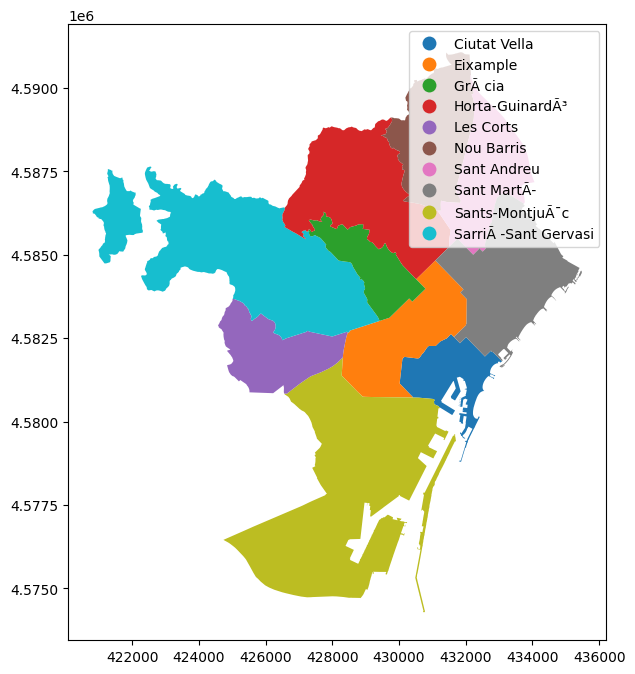

In [ ]:
districtes.plot(column='NOM', legend=True,figsize=(15,8))

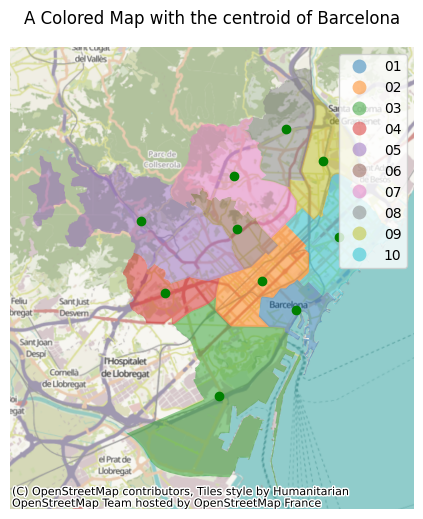

In [ ]:
ax= districtes.plot(column='DISTRICTE', figsize=(12,6), alpha=0.5, legend=True)
districtes['centroid'] = districtes['geometry'].centroid
districtes['centroid'].plot(ax=ax, color="green")
ctx.add_basemap(ax, crs=districtes.crs.to_string())
plt.title('A Colored Map with the centroid of Barcelona')
plt.axis('off')
plt.show()

In [ ]:
districtes_chunk = districtes[['NOM', 'LITERAL', 'PERIMETRE', 'AREA', 'geometry']]

In [ ]:
habitantes = pd.read_csv('/content/barc/Habitantes.csv', sep=";")
habitantes.head()

Distrito  Habitantes
0        Eixample      270694
1      Sant Martí      241691
2  Sants-Montjuïc      187584
3  Horta-Guinardó      174799
4      Nou Barris      174012

In [ ]:
districtes['NOM']

0            Ciutat Vella
1                Eixample
2         Sants-MontjuÃ¯c
3               Les Corts
4    SarriÃ -Sant Gervasi
5                 GrÃ cia
6         Horta-GuinardÃ³
7              Nou Barris
8             Sant Andreu
9             Sant MartÃ­
Name: NOM, dtype: object

In [ ]:
habitantes['Distrito']

0               Eixample
1             Sant Martí
2         Sants-Montjuïc
3         Horta-Guinardó
4             Nou Barris
5            Sant Andreu
6    Sarrià-Sant Gervasi
7                 Gràcia
8           Ciutat Vella
9              Les Corts
Name: Distrito, dtype: object

In [ ]:
mapDis = {'Ciutat Vella': 'Ciutat Vella',
       'Eixample': 'Eixample',
       'Sants-MontjuÃ¯c': 'Sants-Montjuïc',
       'Les Corts': 'Les Corts',
       'SarriÃ -Sant Gervasi': 'Sarrià-Sant Gervasi',
       'GrÃ cia': 'Gràcia',
       'Horta-GuinardÃ³': 'Horta-Guinardó',
       'Nou Barris': 'Nou Barris',
       'Sant Andreu': 'Sant Andreu',
       'Sant MartÃ­': 'Sant Martí'}

In [ ]:
districtes_chunk['NOM']

0            Ciutat Vella
1                Eixample
2         Sants-MontjuÃ¯c
3               Les Corts
4    SarriÃ -Sant Gervasi
5                 GrÃ cia
6         Horta-GuinardÃ³
7              Nou Barris
8             Sant Andreu
9             Sant MartÃ­
Name: NOM, dtype: object

In [ ]:
districtes_chunk['NOM'] = districtes_chunk['NOM'].map(mapDis)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
districtes_chunk['NOM']

0      Ciutat Vella
1          Eixample
2    Sants-Montjuïc
3         Les Corts
4               NaN
5               NaN
6    Horta-Guinardó
7        Nou Barris
8       Sant Andreu
9        Sant Martí
Name: NOM, dtype: object

In [ ]:
# districtes_chunk['MergeColumn'] = habitantes['Distrito'].map(mapDis)
# districtes_chunk.head(10)

In [ ]:
merged_df = districtes_chunk.merge(habitantes, left_on='NOM', right_on='Distrito')

In [ ]:
# merged_df = merged_df.drop(columns=['MergeColumn'])
merged_df

NOM LITERAL  PERIMETRE          AREA  \
0    Ciutat Vella      01  21366.962  4.204931e+06   
1        Eixample      02  13931.644  7.464303e+06   
2  Sants-Montjuïc      03  46711.857  2.287985e+07   
3       Les Corts      04  12551.602  6.010769e+06   
4  Horta-Guinardó      07  20607.189  1.191963e+07   
5      Nou Barris      08  14707.881  8.056468e+06   
6     Sant Andreu      09  15121.527  6.592480e+06   
7      Sant Martí      10  23493.828  1.043670e+07   

                                            geometry        Distrito  \
0  POLYGON ((431733.736 4582441.816, 431827.673 4...    Ciutat Vella   
1  POLYGON ((432033.184 4583665.032, 432032.069 4...        Eixample   
2  MULTIPOLYGON (((428773.911 4580873.742, 428833...  Sants-Montjuïc   
3  POLYGON ((425054.670 4583672.560, 425062.830 4...       Les Corts   
4  POLYGON ((429793.927 4589028.390, 429788.121 4...  Horta-Guinardó   
5  POLYGON ((432115.848 4590999.098, 432119.430 4...      Nou Barris   
6  POLYGON ((432158.516 4590377.238, 432158.904 4...     Sant Andreu   
7  POLYGON ((433770.023 4586475.362, 433737.125 4...      Sant Martí   

   Habitantes  
0      108331  
1      270694  
2      187584  
3       82635  
4      174799  
5      174012  
6      151976  
7      241691

<Axes: >

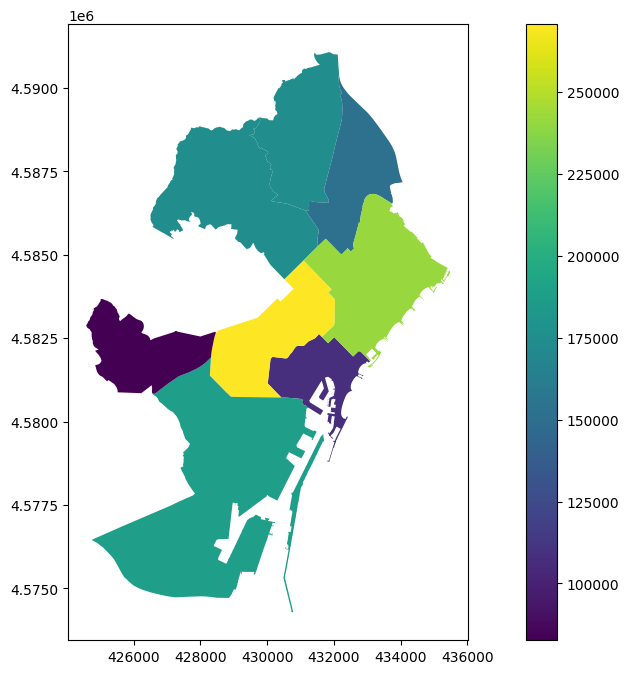

In [ ]:
merged_df.plot(column='Habitantes', legend=True,figsize=(15,8))

In [ ]:
# unique_categories = merged_df['AREA'].unique()
# num_rows = 1  # Change as needed
# num_cols = len(unique_categories)
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5))

# for i, category in enumerate(unique_categories):
#     subset_gdf = merged_df[merged_df['AREA'] == category]
#     ax = axes[i] if num_rows == 1 else axes[0, i]
#     subset_gdf.plot(ax=ax, legend=True)
#     ax.set_title(category)

# for i in range(len(unique_categories), num_cols):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Perform clustering based on 'area'
area_clusters = KMeans(n_clusters=4).fit(merged_df[['AREA']])

# Perform clustering based on 'habitant'
habitant_clusters = KMeans(n_clusters=4).fit(merged_df[['Habitantes']])

# Perform clustering based on 'density'
merged_df['Density'] = merged_df['Habitantes'] / merged_df['AREA']
density_clusters = KMeans(n_clusters=4).fit(merged_df[['Density']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


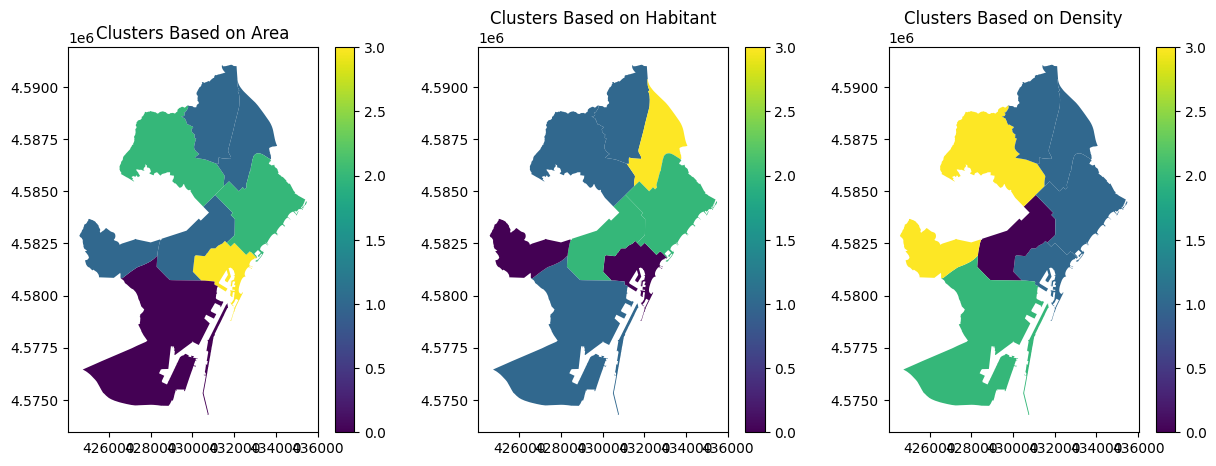

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot clusters based on area
merged_df['area_cluster'] = area_clusters.labels_
merged_df.plot(column='area_cluster', ax=axes[0], legend=True)
axes[0].set_title('Clusters Based on Area')

# Plot clusters based on habitant
merged_df['habitant_cluster'] = habitant_clusters.labels_
merged_df.plot(column='habitant_cluster', ax=axes[1], legend=True)
axes[1].set_title('Clusters Based on Habitant')

# Plot clusters based on density
merged_df['density_cluster'] = density_clusters.labels_
merged_df.plot(column='density_cluster', ax=axes[2], legend=True)
axes[2].set_title('Clusters Based on Density')

plt.show()


In [ ]:
density_clusters.labels_

array([1, 0, 2, 3, 3, 1, 1, 1], dtype=int32)

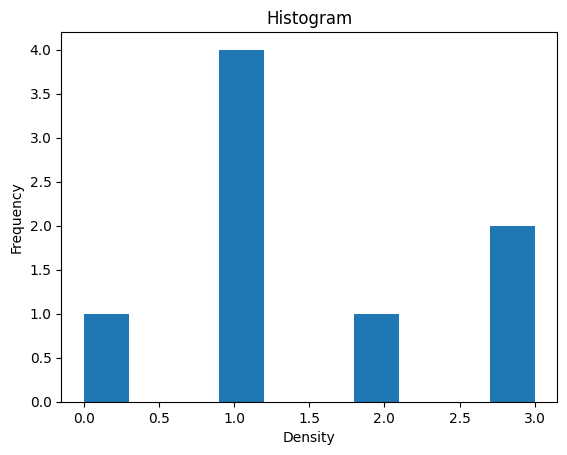

In [ ]:
import matplotlib.pyplot as plt

plt.hist(density_clusters.labels_)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

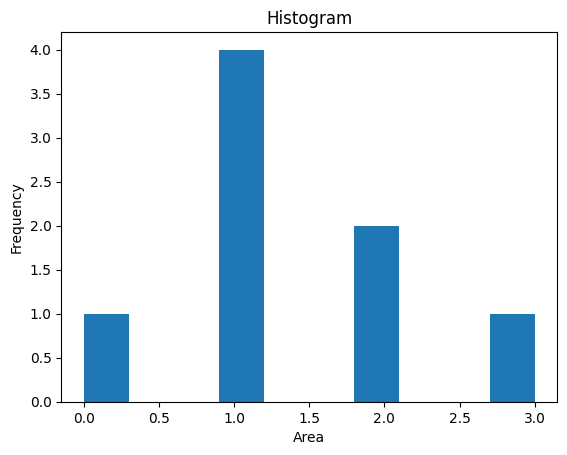

In [ ]:
plt.hist(area_clusters.labels_)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

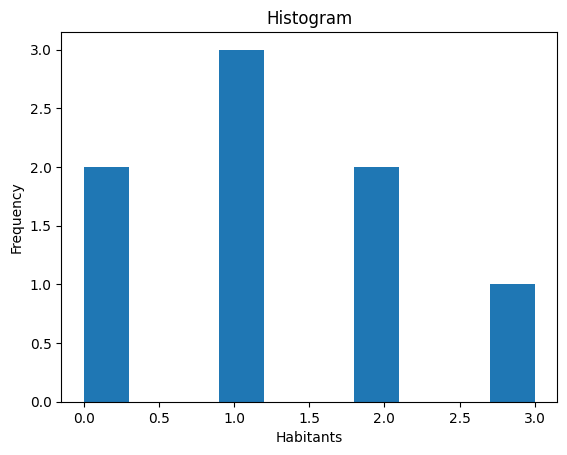

In [ ]:
plt.hist(habitant_clusters.labels_)
plt.xlabel('Habitants')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [10]:
#data = pd.read_csv('/content/database_tst.csv')
import pandas as pd
data = pd.read_csv('database_tst.csv')
data

Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square            ID  Source  \
0                   NaN               NaN  ISCGEM860706  ISCGEM   
1                   NaN               NaN  ISCGEM860737  ISCGEM   
2                   NaN               NaN  ISCGEM860762  ISCGEM   
3                   NaN               NaN  ISCGEM860856  ISCGEM   
4                   NaN               NaN  ISCGEM860890  ISCGEM   
...                 ...               ...           ...     ...   
23407               NaN            0.1898    NN00570710      NN   
23408               NaN            0.2187    NN00570744      NN   
23409               4.8            1.5200    US10007NAF      US   
23410               6.0            1.4300    US10007NL0      US   
23411               4.5            0.9100    US10007NTD      US   

      Location Source Magnitude Source     Status  
0              ISCGEM           ISCGEM  Automatic  
1              ISCGEM           ISCGEM  Automatic  
2              ISCGEM           ISCGEM  Automatic  
3              ISCGEM           ISCGEM  Automatic  
4              ISCGEM           ISCGEM  Automatic  
...               ...              ...        ...  
23407              NN               NN   Reviewed  
23408              NN               NN   Reviewed  
23409              US               US   Reviewed  
23410              US

In [8]:
data.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

In [148]:
sec = data[data['Latitude'] > 19]

In [149]:
sec = sec[sec['Latitude'] < 60]

In [150]:
sec = sec[sec['Longitude'] > -135]

In [151]:
sec = sec[sec['Longitude'] < -100]

In [182]:
sec_not_norm = data[data['Latitude'] > 19]
sec_not_norm = sec_not_norm[sec_not_norm['Latitude'] < 60]
sec_not_norm = sec_not_norm[sec_not_norm['Longitude'] > -135]
sec_not_norm = sec_not_norm[sec_not_norm['Longitude'] < -100]

In [183]:
sec_not_norm = sec_not_norm.sample(100)

In [152]:
sec = sec.sample(100)

In [153]:
len(sec)

100

In [154]:
zip_ref2 = zipfile.ZipFile('California_County_Boundaries.zip', 'r'); zip_ref2.extractall(); zip_ref2.close()
California = gpd.read_file('usa-states-census-2014 (1).shp')

In [155]:
zip_ref3 = zip_ref = zipfile.ZipFile('Qfaults_GIS.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Fault = gpd.read_file('CEUS_Q_faults_USGS_pl_R0.shp')

In [156]:
# zip_ref3 = zip_ref = zipfile.ZipFile('/USGS_SGMC_Shapefiles.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Fault3 = gpd.read_file('SGMC_Structure.shp')

In [157]:
zip_ref3 = zip_ref = zipfile.ZipFile('CGS_Seismic_Hazards_Program%3A_Alquist-Priolo_Fault_Hazard_Zones (1).zip', 'r'); zip_ref.extractall(); zip_ref.close()
Fault2 = gpd.read_file('CGS_Seismic_Hazards_Program%3A_Alquist-Priolo_Fault_Hazard_Zones.shp')

In [158]:
sec[['Latitude', 'Longitude', 'Magnitude', 'Depth']]

Latitude   Longitude  Magnitude   Depth
8008   19.960000 -115.881000       5.50  10.000
15263  49.330000 -128.790000       5.90  10.000
20122  32.705000 -115.911333       5.72   8.756
9259   50.801000 -130.054000       5.60  10.000
18876  41.144400 -114.872100       6.20   7.900
...          ...         ...        ...     ...
21452  25.127000 -109.574000       5.90  14.000
13246  49.047000 -127.880000       6.20  10.000
11756  34.275000 -118.493000       5.89   5.317
22787  24.809400 -109.513800       5.60  10.000
5302   32.667333 -115.359167       6.40  15.000

[100 rows x 4 columns]

In [159]:
minim = min(list(sec['Magnitude']))
maxim = max(list(sec['Magnitude']))
sec['Magnitude']=(sec['Magnitude']- minim)/maxim

In [160]:
minim = min(list(sec['Depth']))
maxim = max(list(sec['Depth']))
sec['Depth']=(sec['Depth']- minim)/maxim

In [161]:
sec[['Latitude', 'Longitude']]

Latitude   Longitude
8008   19.960000 -115.881000
15263  49.330000 -128.790000
20122  32.705000 -115.911333
9259   50.801000 -130.054000
18876  41.144400 -114.872100
...          ...         ...
21452  25.127000 -109.574000
13246  49.047000 -127.880000
11756  34.275000 -118.493000
22787  24.809400 -109.513800
5302   32.667333 -115.359167

[100 rows x 2 columns]

In [162]:
listOfPoints = []
for e1, e2 in zip(sec['Latitude'], sec['Longitude']):
  print(e1, e2)
  point = (e2, e1)
  listOfPoints.append(point)

19.96 -115.881
49.33 -128.79
32.705 -115.9113333
50.801 -130.054
41.1444 -114.8721
44.058 -113.857
43.489 -128.038
22.359 -106.994
31.9976667 -115.0016667
33.96 -116.317
19.853 -109.165
37.608 -118.888
19.763 -109.234
47.074 -123.4636667
32.1998333 -115.1221667
26.261 -110.537
48.973 -128.77
43.584 -127.638
24.696 -109.156
19.638 -109.108
51.1832 -130.2245
31.296 -114.417
32.3188333 -115.3215
41.679 -125.856
47.288 -122.406
31.095 -119.66
32.32 -115.32
27.557 -112.419
40.3353333 -124.2286667
43.493 -127.252
51.254 -130.746
19.282 -108.386
34.2 -116.437
44.525 -129.961
41.0528333 -125.3433333
40.535 -125.444
37.1038333 -121.5123333
33.02 -115.58
19.379 -104.975
22.371 -106.973
23.084 -108.454
49.479 -129.496
38.1383333 -118.3913333
37.5838333 -118.8645
23.915 -108.549
37.4321667 -118.6071667
25.892 -110.076
19.055 -104.205
20.357 -115.765
41.9086667 -126.2343333
34.12 -116.323
19.279 -108.27
31.0395 -113.7773333
37.5666667 -118.4381667
37.32 -121.7
37.38 -114.157
36.151 -120.049
34.35 -

In [163]:
pointDF = gpd.GeoDataFrame(geometry=gpd.points_from_xy([p[0] for p in listOfPoints], [p[1] for p in listOfPoints]))

In [164]:
pointDF['Mag'] =list(sec['Magnitude'])
pointDF['De'] =list(sec['Depth'])

In [184]:
listOfPoints_notNorm = []
for e1, e2 in zip(sec_not_norm['Latitude'], sec_not_norm['Longitude']):
  print(e1, e2)
  point = (e2, e1)
  listOfPoints_notNorm.append(point)

40.5038333 -125.1303333
37.5206667 -118.8761667
40.4325 -124.566
51.692 -131.055
19.269 -108.481
40.8287 -125.1338
49.6614 -127.4286
51.187 -130.361
42.762 -110.976
51.254 -130.746
36.151 -120.049
51.163 -130.542
43.597 -128.135
25.892 -110.076
31.205 -114.315
19.379 -104.975
34.0 -116.61
48.69 -128.71
26.74 -110.806
37.6243333 -118.7551667
43.542 -127.414
27.565 -112.528
29.328 -113.68
27.557 -112.419
47.074 -123.4636667
51.62 -131.133
34.131 -116.408
19.596 -106.066
49.623 -126.967
23.084 -108.454
23.714 -108.395
24.066 -108.788
19.199 -104.44
37.38 -114.157
19.104 -101.833
32.3188333 -115.3215
51.011 -130.381
40.408 -125.6465
40.652 -124.6925
37.2315 -116.4736667
51.244 -130.3971
43.51 -127.561
41.6611667 -125.8455
37.4791667 -121.6866667
40.42 -124.41
38.819 -119.652
25.154 -109.259
34.2 -116.437
37.6768333 -118.8996667
34.162 -116.852
37.538 -118.4428333
40.535 -125.444
50.801 -130.054
24.8094 -109.5138
34.26 -118.0
31.0395 -113.7773333
21.335 -108.814
44.149 -129.183
37.852 -121.

In [185]:
pointDF_notNorm = gpd.GeoDataFrame(geometry=gpd.points_from_xy([p[0] for p in listOfPoints_notNorm], [p[1] for p in listOfPoints_notNorm]))

In [186]:
pointDF_notNorm['Mag'] =list(sec_not_norm['Magnitude'])
pointDF_notNorm['De'] =list(sec_not_norm['Depth'])

In [165]:
len(pointDF)

100

In [166]:
copypoint = pointDF.copy()

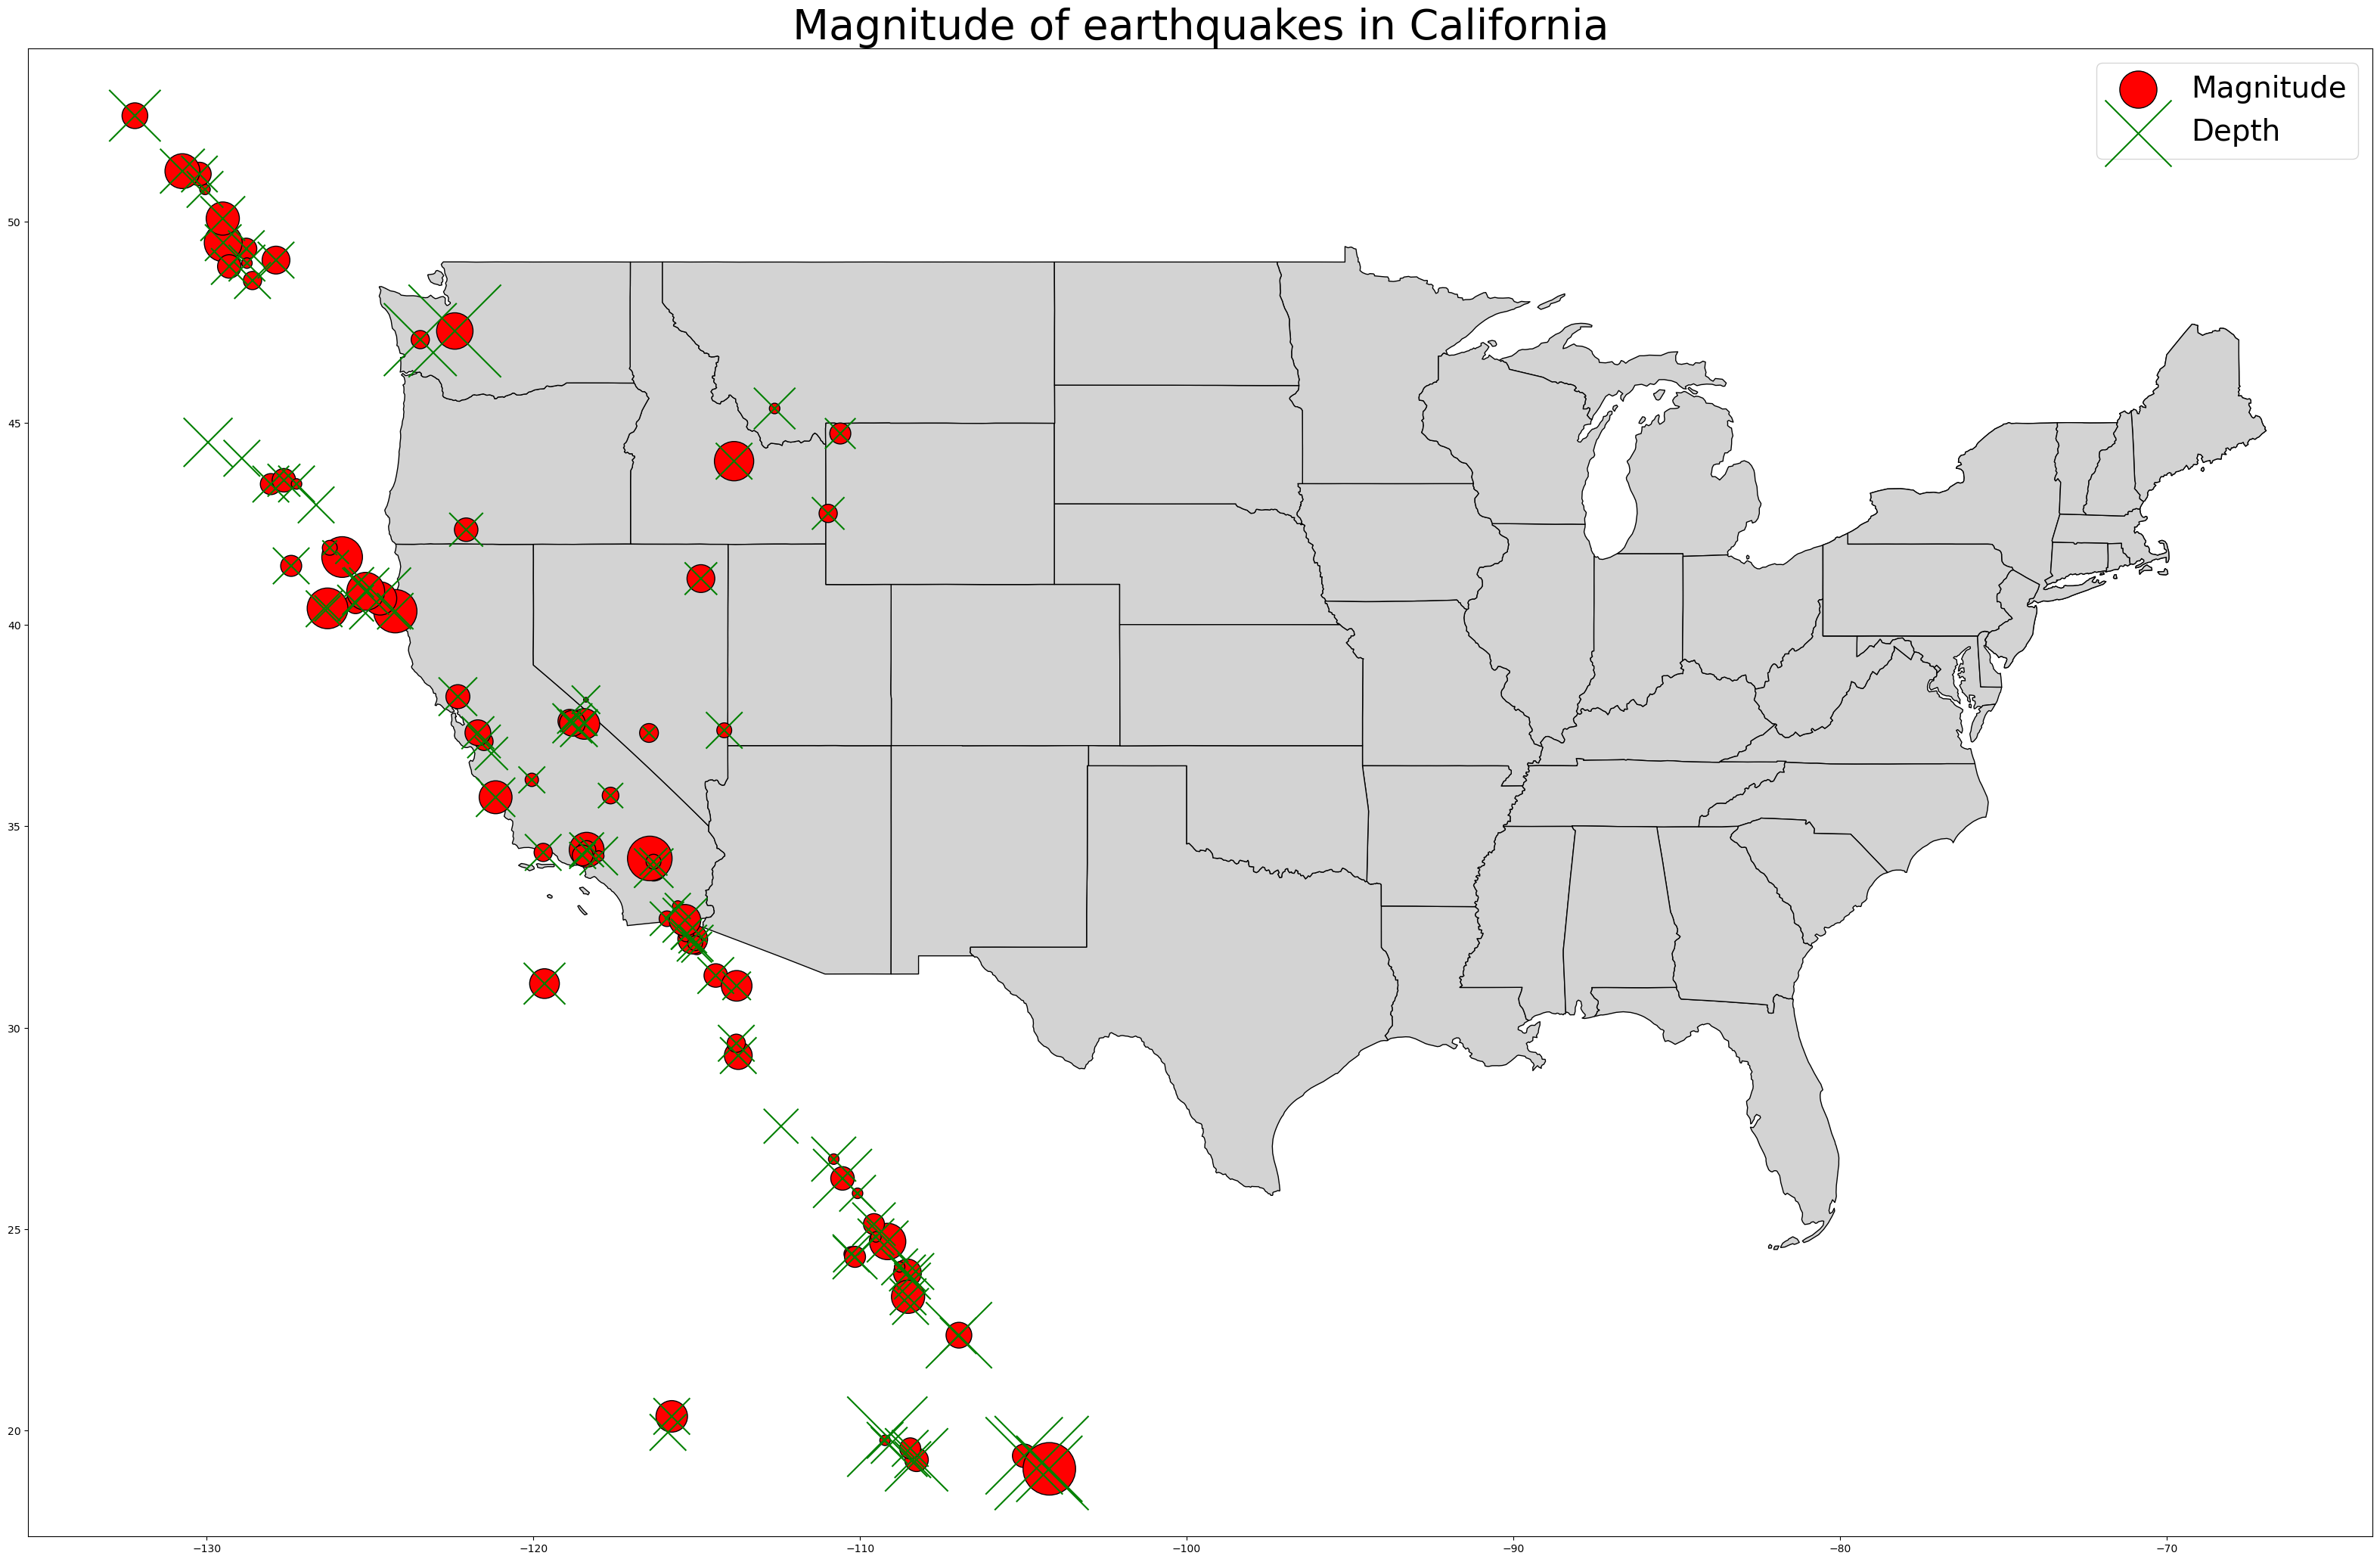

In [218]:
# ax= calif.plot(figsize=(40, 40), color= 'lightgrey', edgecolor='black')
ax= California.plot(figsize=(40, 40), color= 'lightgrey', edgecolor='black')

pointDF.plot(ax=ax, marker= 'o', color='red', edgecolor='black',markersize=pointDF['Mag']*8000, label= 'Magnitude')
copypoint.plot(ax=ax, marker= 'x', color='green',markersize=copypoint['De']*8000, label = 'Depth')
plt.title('Magnitude of earthquakes in California', fontsize = 40)
ax.legend(fontsize= 28)

# minx, miny, maxx, maxy = pointDF.total_bounds
# padding = 0.2
# ax.set_xlim(minx - padding, maxx + padding)
# ax.set_ylim(miny - padding, maxy + padding)

# calif.plot(ax= ax, edgecolor= 'blue', linewidth=1)
# plt.axis('off')
# plt.savefig('earthquake.png', dpi=300)
plt.show()

In [168]:
import folium
import geopandas as gpd

# Assuming California, pointDF, and copypoint are GeoDataFrames

# Set the target CRS (EPSG:4326)
target_crs = 'EPSG:4326'

# Set CRS for California GeoDataFrame
California.crs = target_crs

# Set CRS for pointDF and copypoint GeoDataFrames
pointDF.crs = target_crs
copypoint.crs = target_crs

# Create a base map centered around California
m = folium.Map(location=[California.geometry.centroid.y.mean(), California.geometry.centroid.x.mean()], zoom_start=6)

# Add GeoJSON layer for California
folium.GeoJson(California, style_function=lambda x: {'color': 'lightgrey', 'weight': 1, 'fillColor': 'lightgrey', 'fillOpacity': 0.7}).add_to(m)

# Add markers for pointDF
for idx, row in pointDF.iterrows():
    location = row['geometry'].y, row['geometry'].x
    folium.CircleMarker(location=location, radius=row['Mag'] * 8, color='red', fill=True, fill_color='red', fill_opacity=0.7).add_to(m)

# Add markers for copypoint
for idx, row in copypoint.iterrows():
     location = row['geometry'].y, row['geometry'].x
     folium.Marker(location=location, icon=folium.Icon(color='green'), popup=f"De: {row['De']}").add_to(m)

# Display the map
m




/var/folders/dv/mzx7jn1x3kl0nmj687m2w21r0000gn/T/ipykernel_50300/2599414011.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[California.geometry.centroid.y.mean(), California.geometry.centroid.x.mean()], zoom_start=6)


In [169]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# Assuming California and pointDF are GeoDataFrames

# Set the target CRS (EPSG:4326)
target_crs = 'EPSG:4326'

# Set CRS for California GeoDataFrame
California.crs = target_crs

# Set CRS for pointDF GeoDataFrame
pointDF.crs = target_crs

# Create a base map centered around California
m = folium.Map(location=[California.geometry.centroid.y.mean(), California.geometry.centroid.x.mean()], zoom_start=6)

# Add GeoJSON layer for California
folium.GeoJson(California, style_function=lambda x: {'color': 'lightgrey', 'weight': 1, 'fillColor': 'lightgrey', 'fillOpacity': 0.7}).add_to(m)

# Extract coordinates for HeatMap
heat_data = [[point.y, point.x, mag] for point, mag in zip(pointDF['geometry'], pointDF['Mag'])]

# Add HeatMap layer
HeatMap(heat_data).add_to(m)

# Display the map
m



/var/folders/dv/mzx7jn1x3kl0nmj687m2w21r0000gn/T/ipykernel_50300/2947494184.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[California.geometry.centroid.y.mean(), California.geometry.centroid.x.mean()], zoom_start=6)


/Users/Hadi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


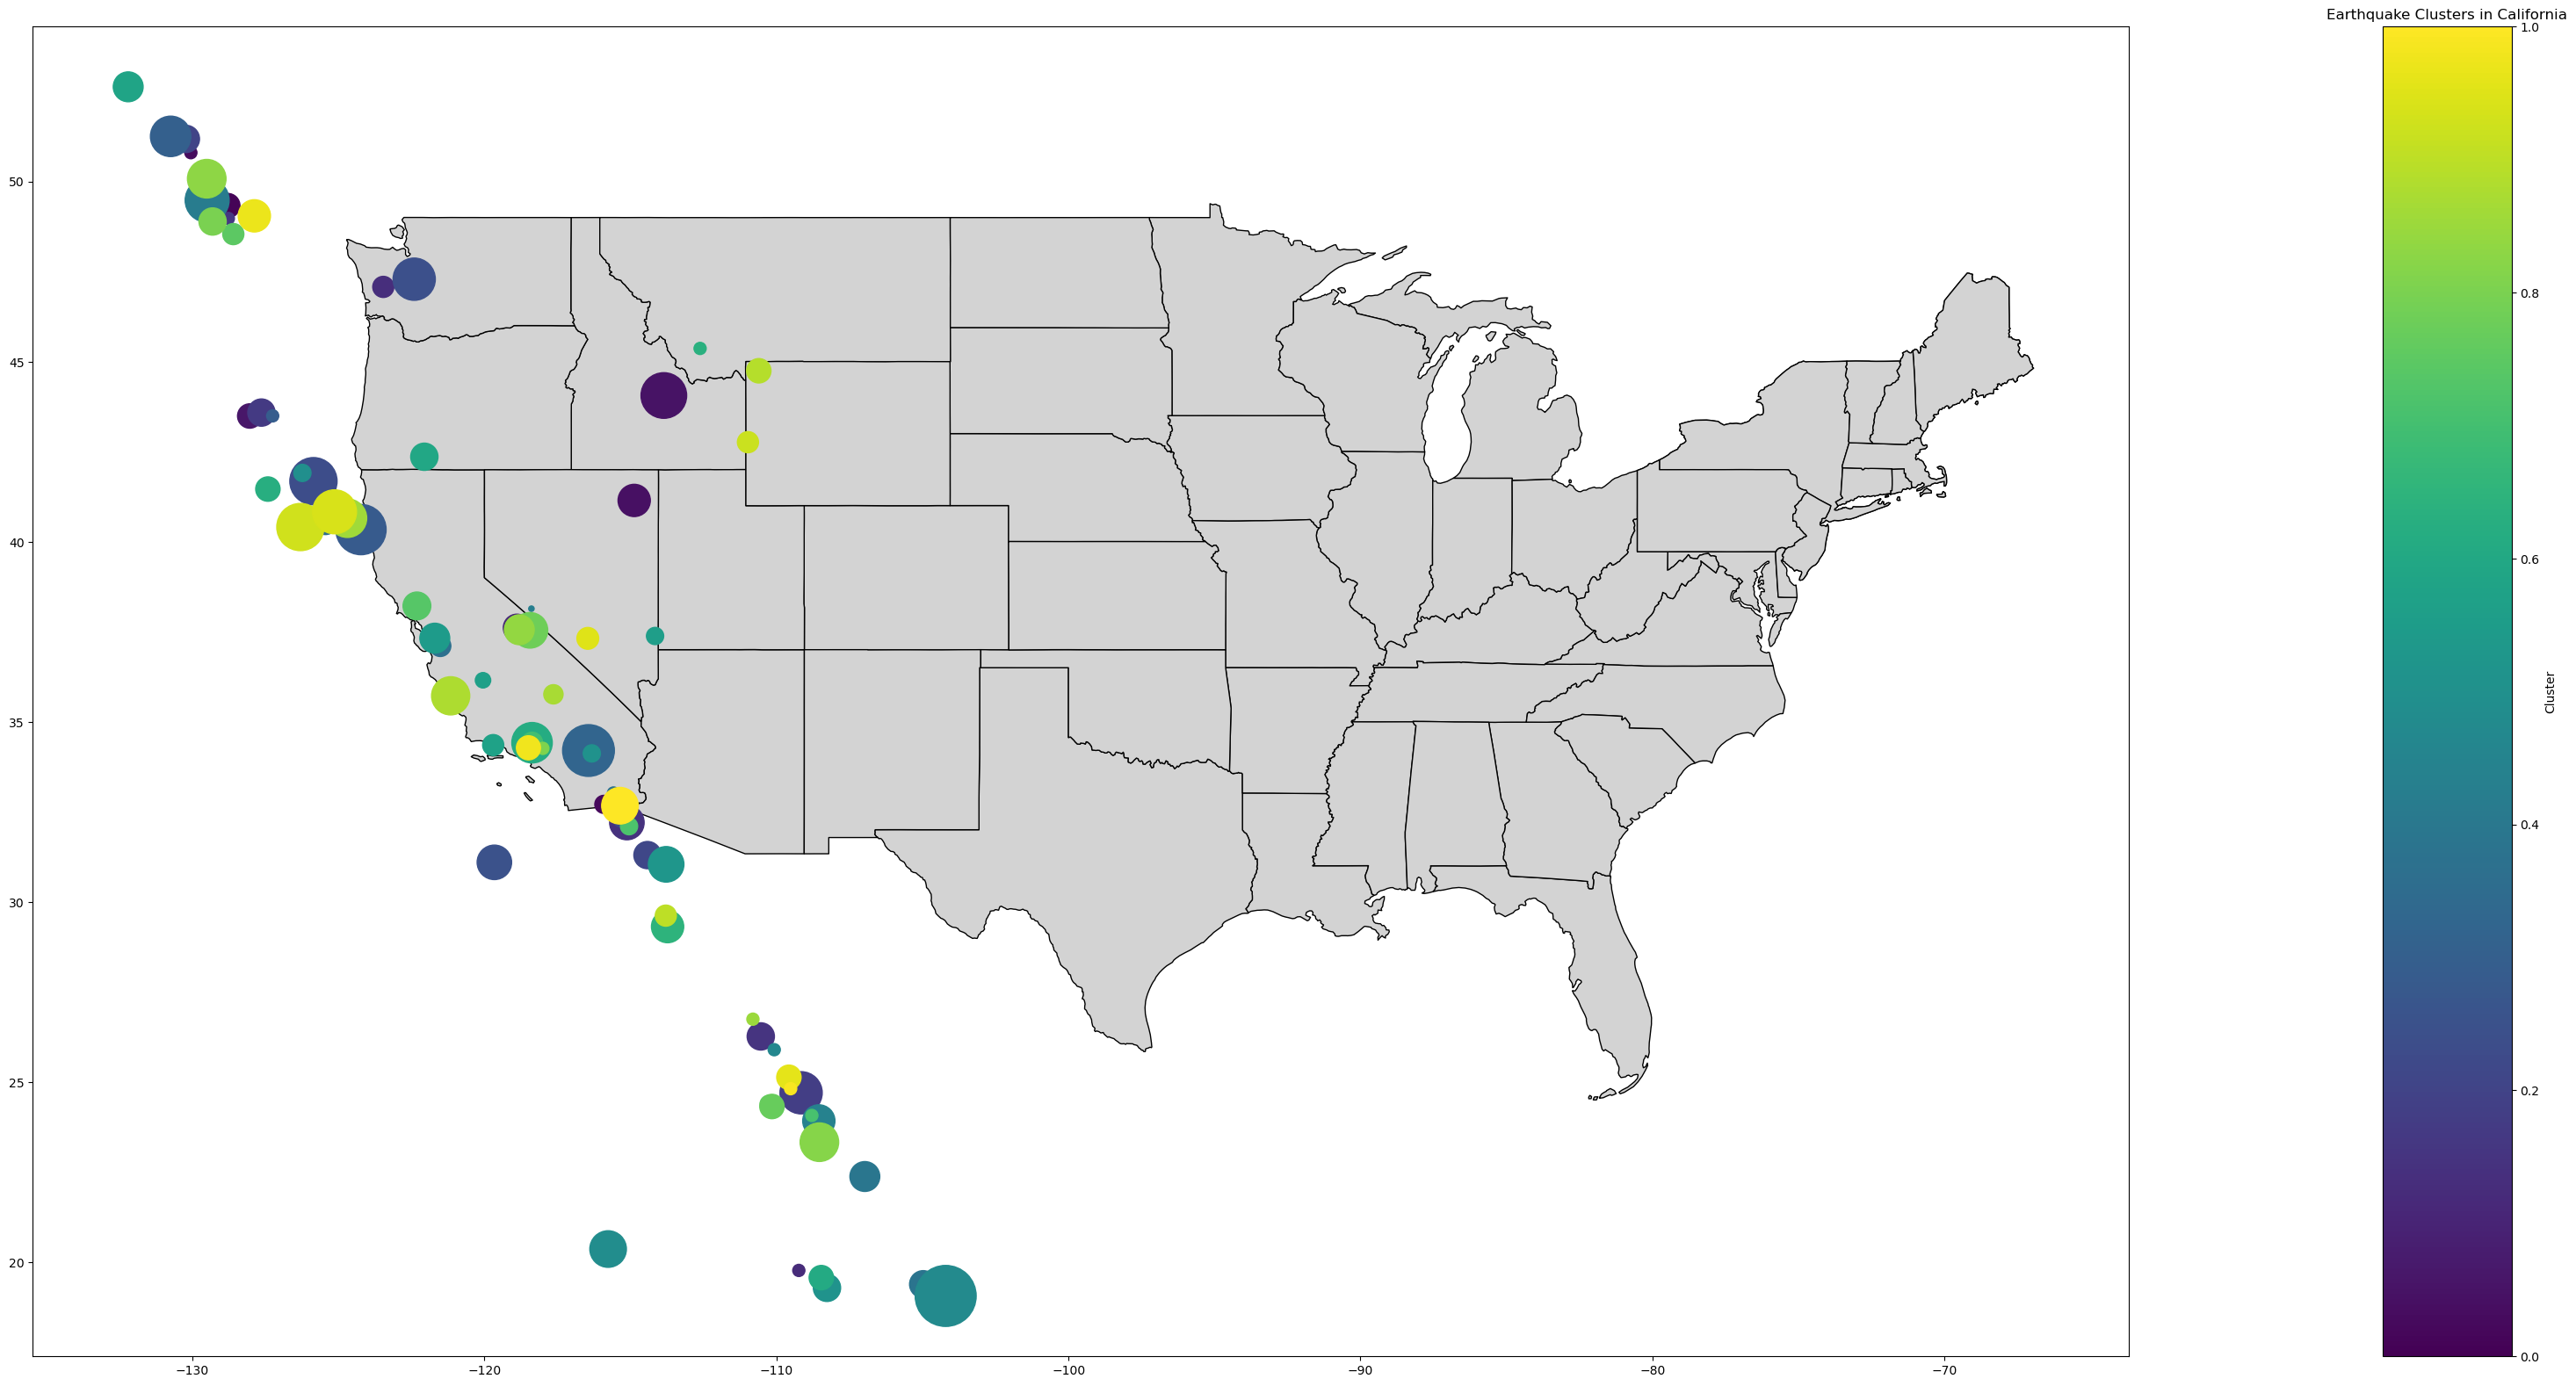

In [211]:
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming California and pointDF are GeoDataFrames

# Set the target CRS (EPSG:4326)
target_crs = 'EPSG:4326'

# Set CRS for California GeoDataFrame
California.crs = target_crs

# Set CRS for pointDF GeoDataFrame
pointDF.crs = target_crs

# Create a base map centered around California
fig, ax = plt.subplots(figsize=(40, 40))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot GeoJSON layer for California
California.plot(ax=ax, color='lightgrey', edgecolor='black')

# Apply K-Means clustering to the GeoDataFrame
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# Extract X, Y coordinates from the geometry
pointDF['X'] = pointDF['geometry'].x
pointDF['Y'] = pointDF['geometry'].y
# Fit K-Means on X, Y coordinates
pointDF['Cluster'] = kmeans.fit_predict(pointDF[['Mag']])

# Plot clustered earthquake points
scatter = pointDF.plot(ax=ax, marker='o', c=pointDF['Mag'], cmap='viridis', legend=True, cax=cax, markersize=pointDF['Mag'] * 8000)

# Set plot title
plt.title('Earthquake Clusters in California')

# Add colorbar
cbar = fig.colorbar(scatter.get_children()[0], cax=cax)
cbar.set_label('Cluster')

# Show the map
plt.show()



In [181]:
pointDF

geometry      Mag        De           X          Y  \
0   POINT (-115.88100 19.96000)  0.00000  0.151153 -115.881000  19.960000   
1   POINT (-128.79000 49.33000)  0.05000  0.151153 -128.790000  49.330000   
2   POINT (-115.91133 32.70500)  0.02750  0.132530 -115.911333  32.705000   
3   POINT (-130.05400 50.80100)  0.01250  0.151153 -130.054000  50.801000   
4   POINT (-114.87210 41.14440)  0.08750  0.119716 -114.872100  41.144400   
..                          ...      ...       ...         ...        ...   
95  POINT (-109.57400 25.12700)  0.05000  0.211033 -109.574000  25.127000   
96  POINT (-127.88000 49.04700)  0.08750  0.151153 -127.880000  49.047000   
97  POINT (-118.49300 34.27500)  0.04875  0.081048 -118.493000  34.275000   
98  POINT (-109.51380 24.80940)  0.01250  0.151153 -109.513800  24.809400   
99  POINT (-115.35917 32.66733)  0.11250  0.226003 -115.359167  32.667333   

    Cluster  
0         1  
1         0  
2         1  
3         1  
4         0  
..      ...  
95        0  
96        0  
97        0  
98        1  
99        2  

[100 rows x 6 columns]

/Users/Hadi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


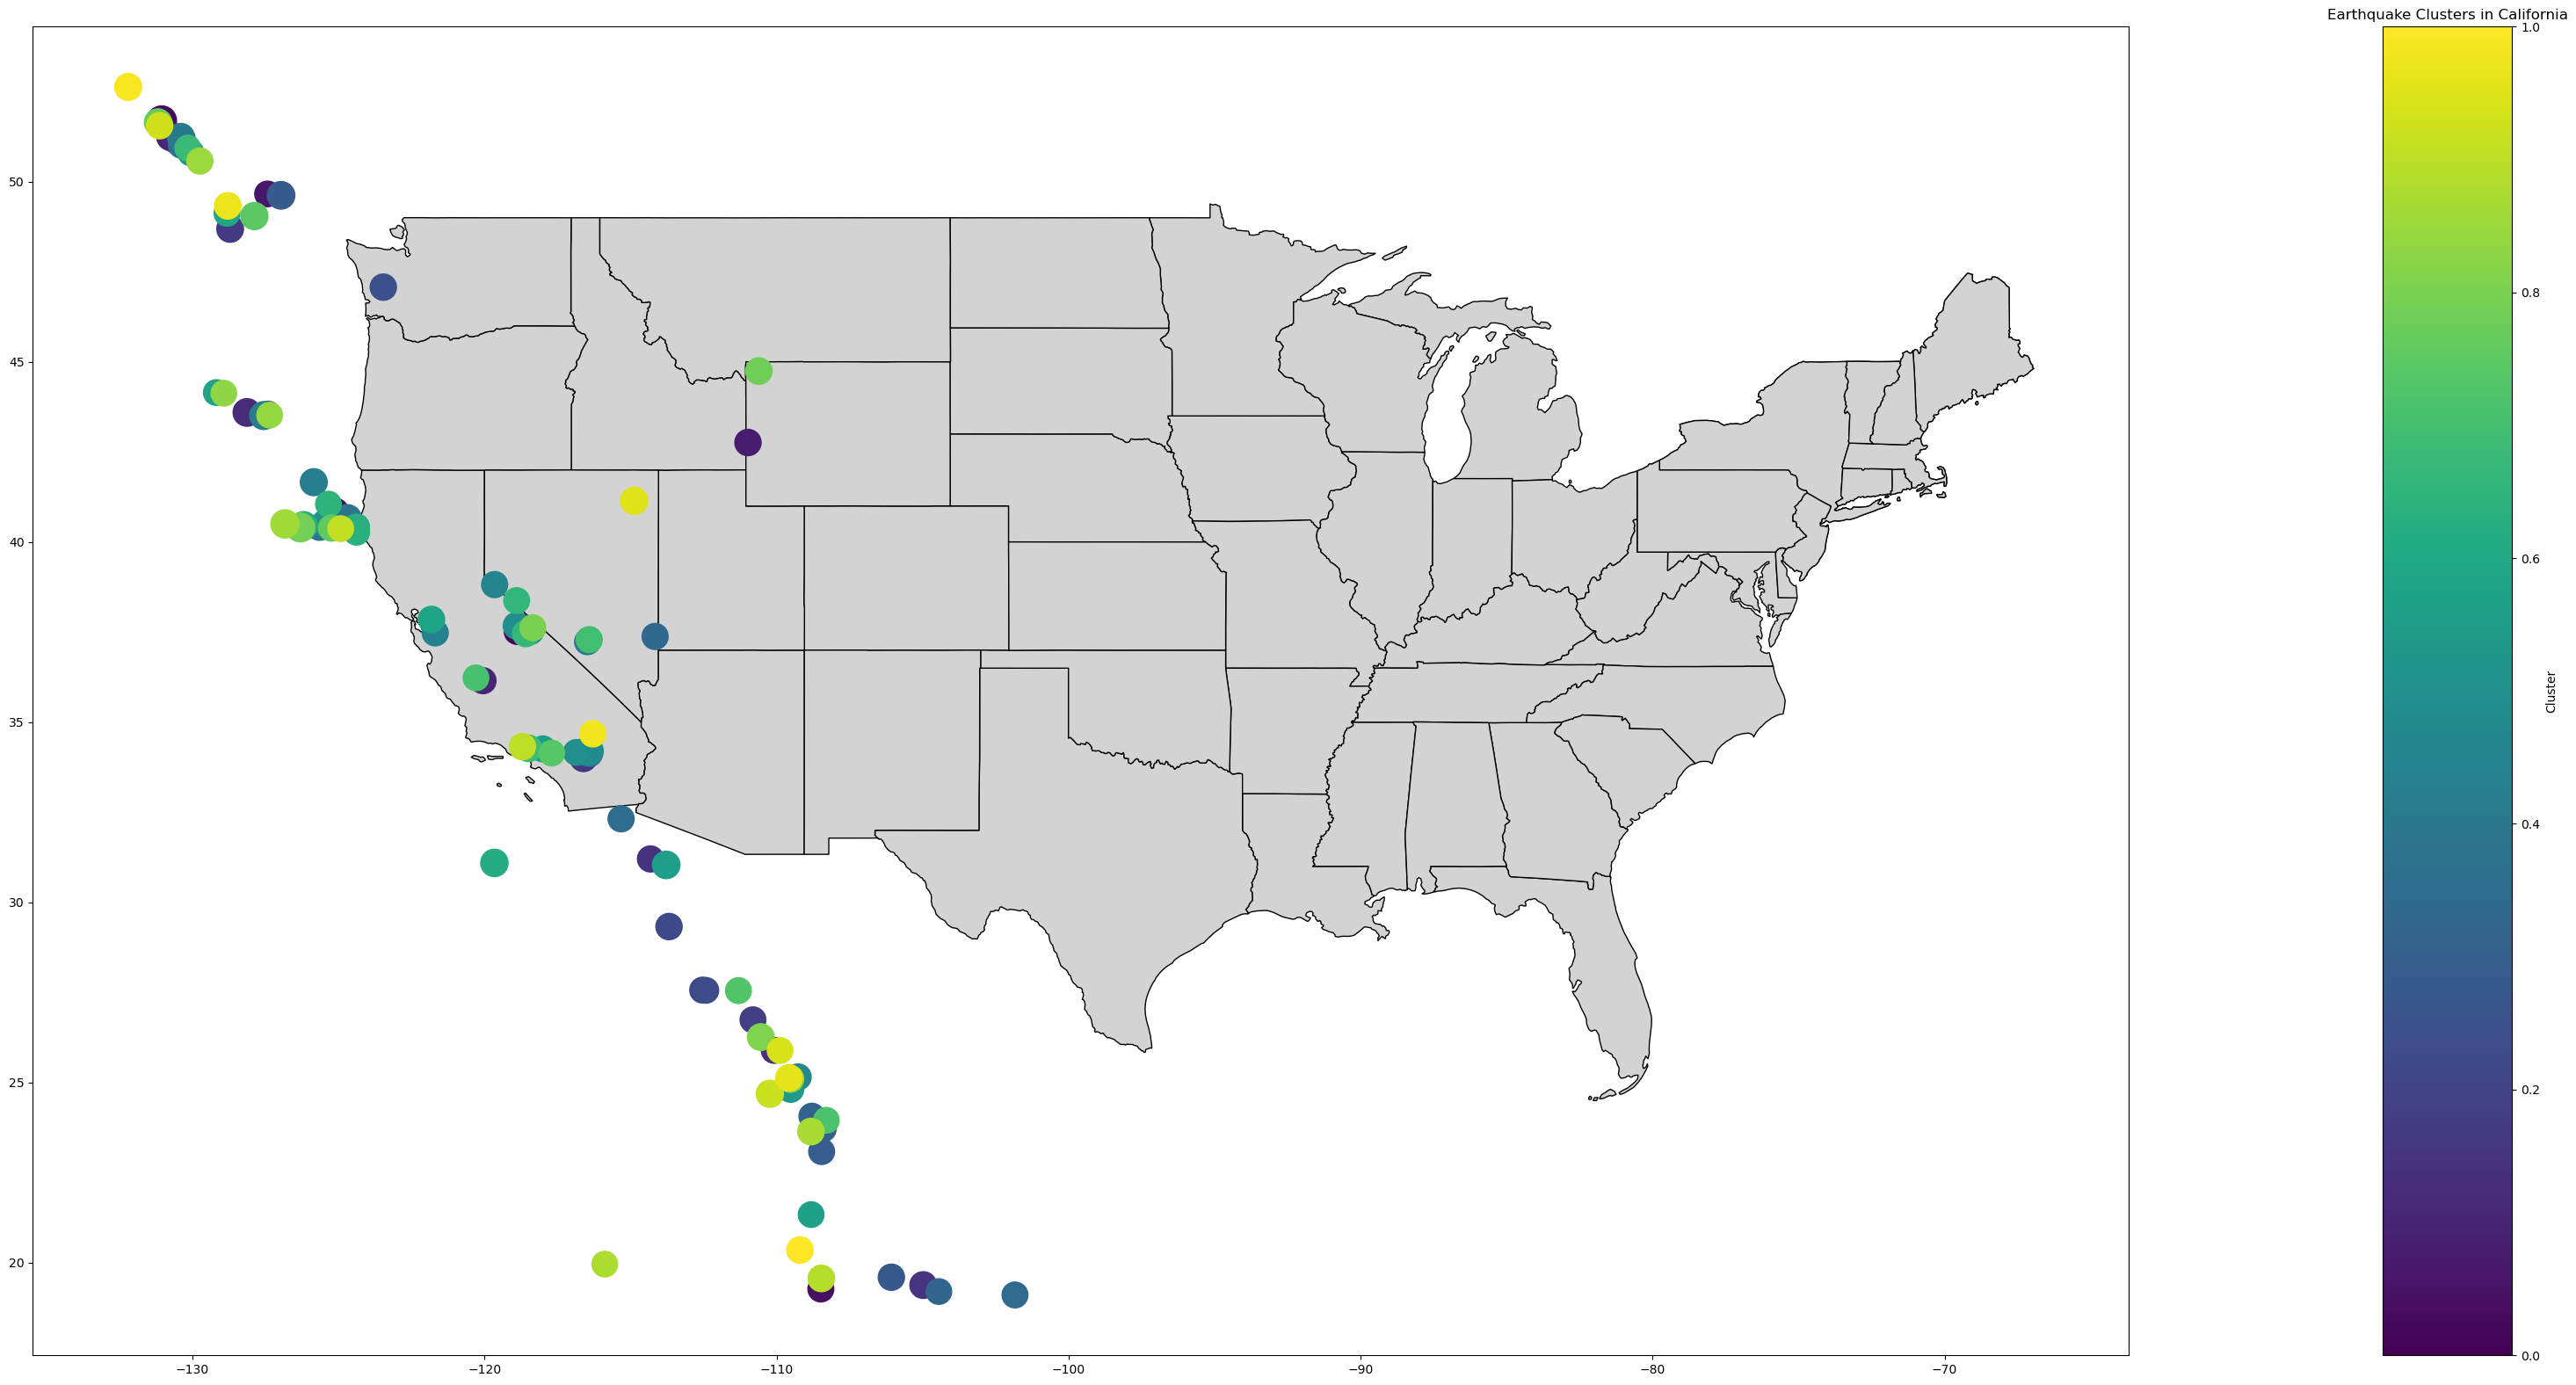

In [207]:
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming California and pointDF are GeoDataFrames

# Set the target CRS (EPSG:4326)
target_crs = 'EPSG:4326'

# Set CRS for California GeoDataFrame
California.crs = target_crs

# Set CRS for pointDF GeoDataFrame
pointDF_notNorm.crs = target_crs

# Create a base map centered around California
fig, ax = plt.subplots(figsize=(40, 40))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot GeoJSON layer for California
California.plot(ax=ax, color='lightgrey', edgecolor='black')

# Apply K-Means clustering to the GeoDataFrame
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# Extract X, Y coordinates from the geometry
pointDF_notNorm['X'] = pointDF_notNorm['geometry'].x
pointDF_notNorm['Y'] = pointDF_notNorm['geometry'].y
# Fit K-Means on X, Y coordinates
pointDF_notNorm['Cluster'] = kmeans.fit_predict(pointDF_notNorm[['Mag']])

# Plot clustered earthquake points
scatter = pointDF_notNorm.plot(ax=ax, marker='o', c=pointDF_notNorm['Cluster'], cmap='viridis', legend=True, cax=cax, markersize=pointDF_notNorm['Mag'] * 80)

# Set plot title
plt.title('Earthquake Clusters in California')

# Add colorbar
cbar = fig.colorbar(scatter.get_children()[0], cax=cax)
cbar.set_label('Cluster')

# Show the map
plt.show()

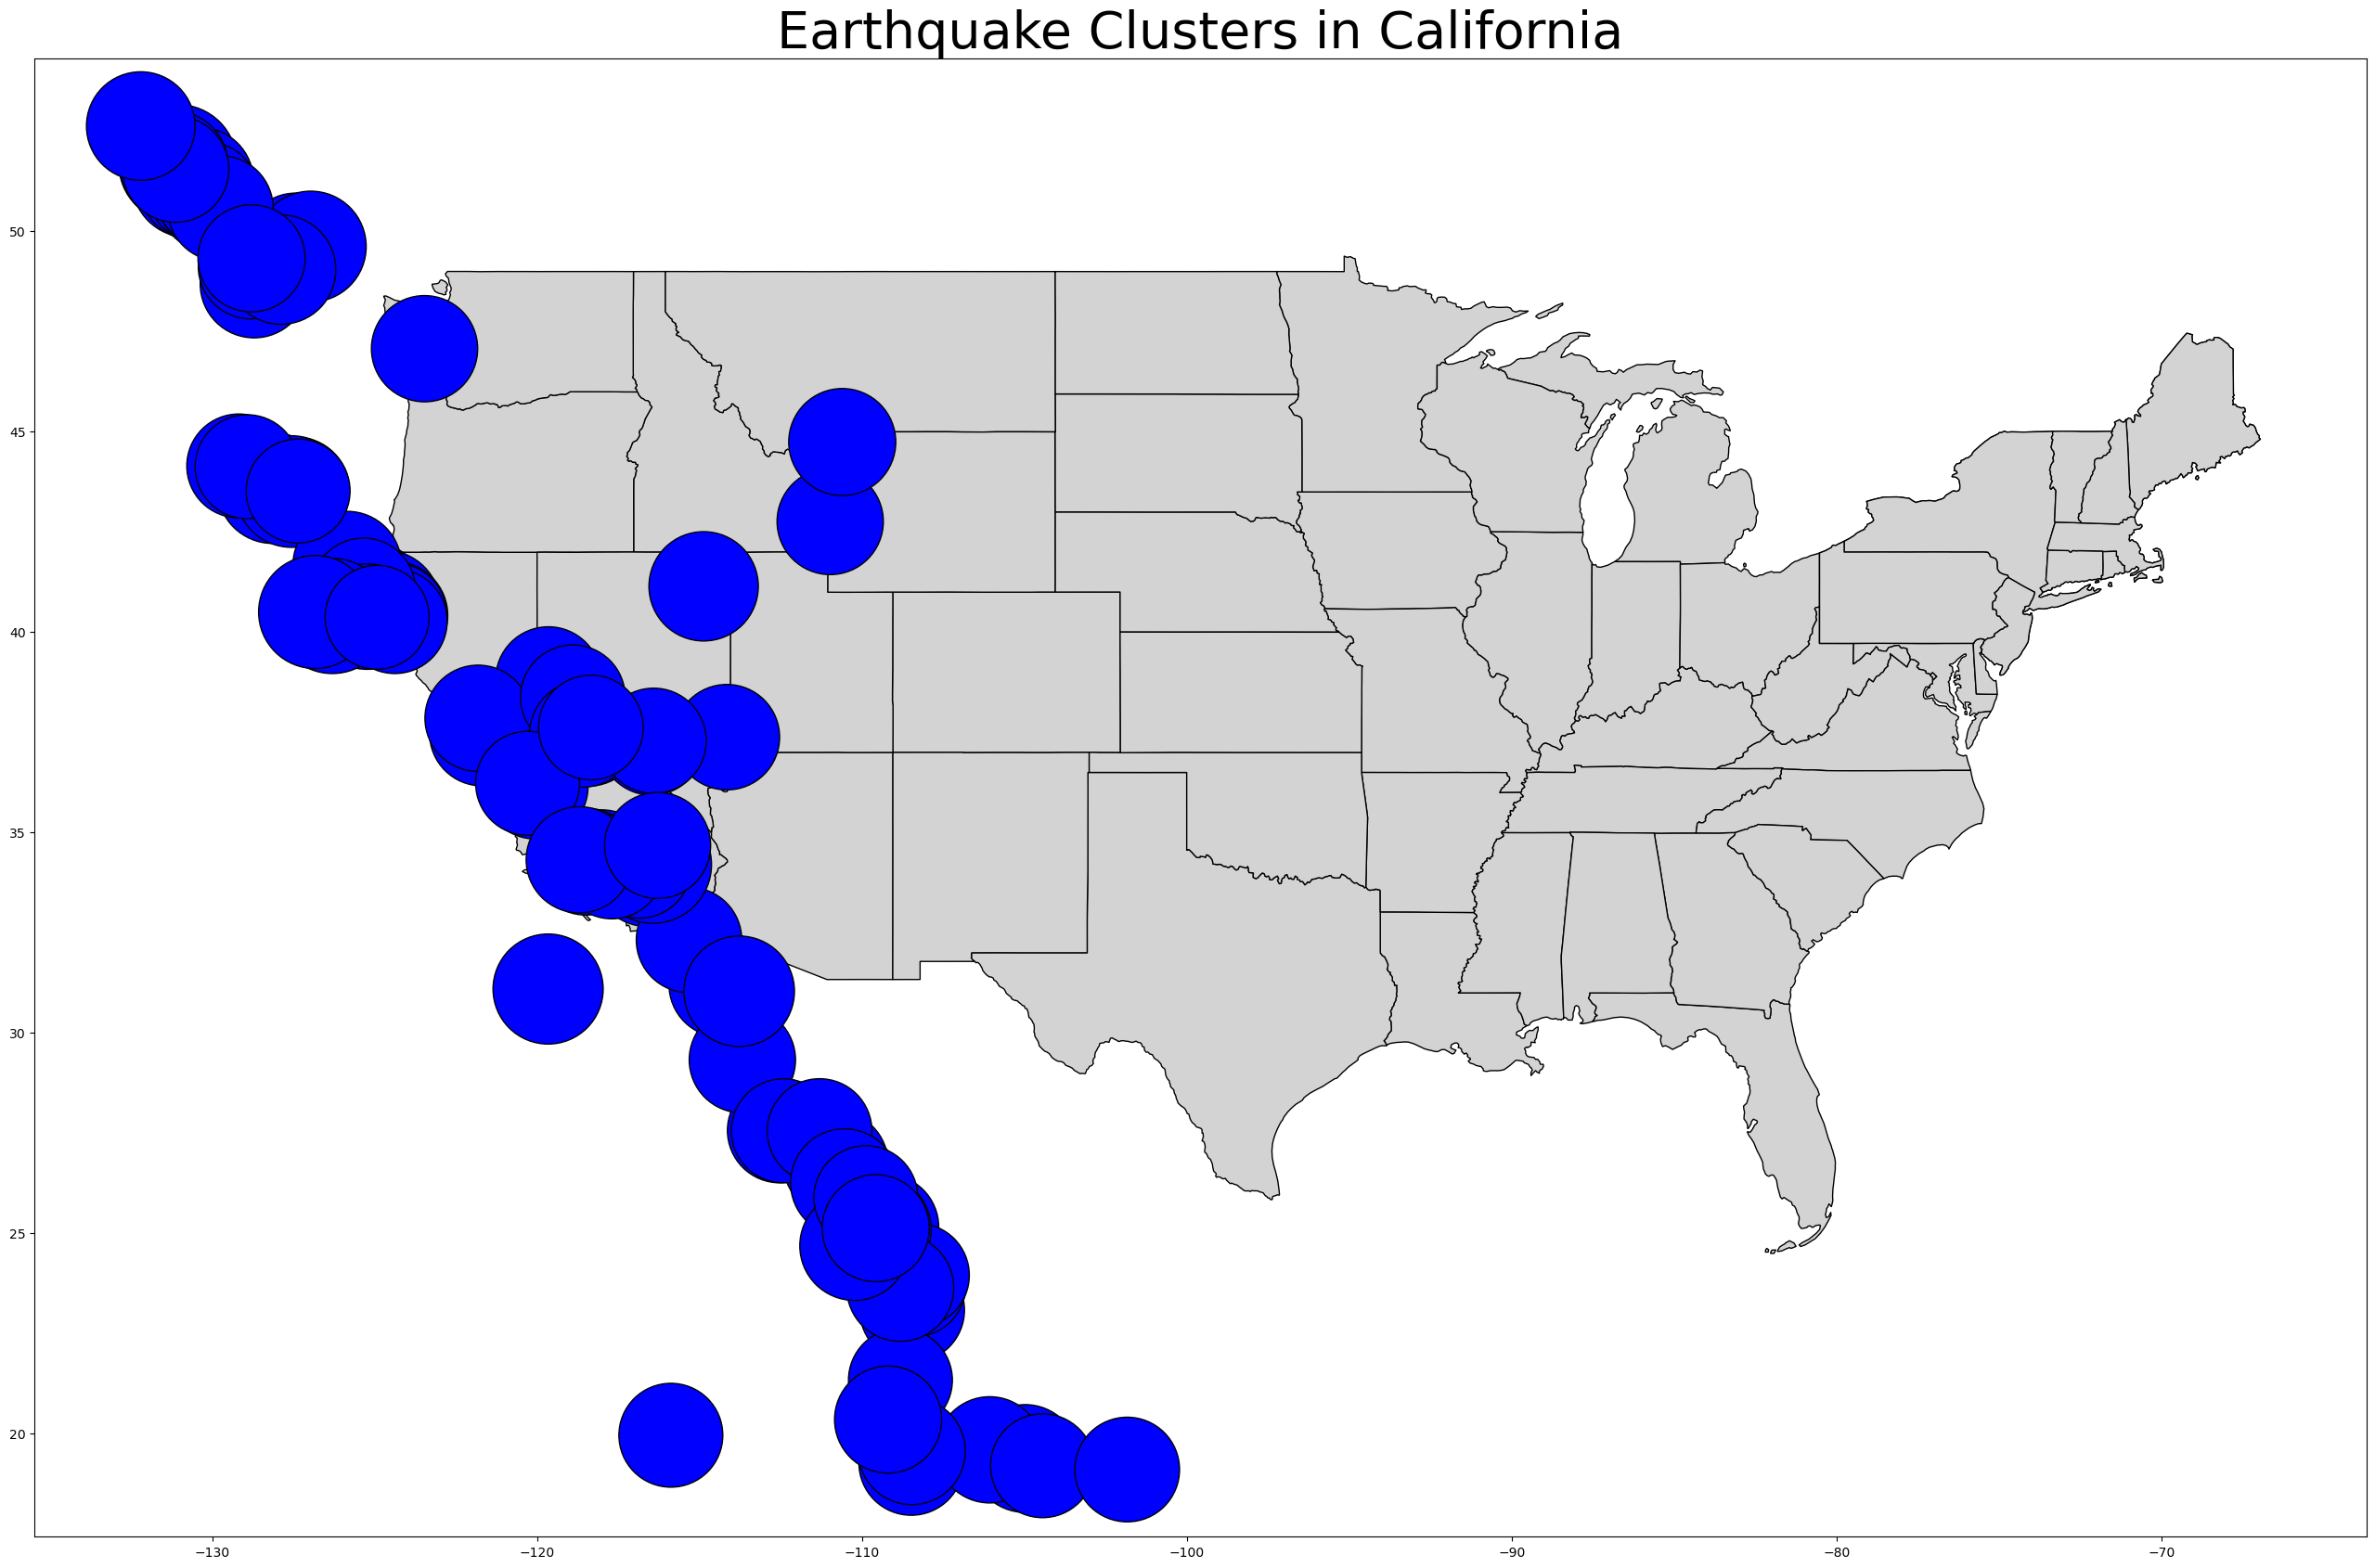

In [226]:
fig, ax = plt.subplots(figsize=(40, 40))
divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot GeoJSON layer for California
California.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot clustered earthquake points
scatter = pointDF_notNorm.plot(ax=ax, marker='o', color='blue',edgecolor='black', legend=True, markersize=(pointDF_notNorm['Mag'] +1) * 1000)

# Set plot title
plt.title('Earthquake Clusters in California', fontsize = 40)

# Add colorbar
# cbar = fig.colorbar(scatter.get_children()[0], cax=cax)
# cbar.set_label('Cluster')

# Show the map
plt.show()

In [209]:
pointDF_notNorm

geometry   Mag      De           X          Y  Cluster
0   POINT (-125.13033 40.50383)  6.60   4.333 -125.130333  40.503833        1
1   POINT (-118.87617 37.52067)  5.70   2.063 -118.876167  37.520667        2
2   POINT (-124.56600 40.43250)  6.45  18.824 -124.566000  40.432500        1
3   POINT (-131.05500 51.69200)  7.40  18.300 -131.055000  51.692000        1
4   POINT (-108.48100 19.26900)  5.60  10.000 -108.481000  19.269000        2
..                          ...   ...     ...         ...        ...      ...
95  POINT (-109.57400 25.12700)  5.90  14.000 -109.574000  25.127000        0
96  POINT (-128.79000 49.33000)  5.90  10.000 -128.790000  49.330000        0
97  POINT (-116.28950 34.67817)  5.77  13.906 -116.289500  34.678167        0
98  POINT (-132.20000 52.63000)  6.10  20.000 -132.200000  52.630000        0
99  POINT (-109.19400 20.35100)  5.90  10.000 -109.194000  20.351000        0

[100 rows x 6 columns]

In [114]:
California.get_coordinates()

x          y
0  -118.593969  33.467198
0  -118.484785  33.487483
0  -118.370323  33.409285
0  -118.286261  33.351463
0  -118.325244  33.299075
..         ...        ...
57  -75.528088  39.498114
57  -75.527676  39.535278
57  -75.512732  39.578000
57  -75.543965  39.596000
57  -75.559446  39.629812

[12720 rows x 2 columns]

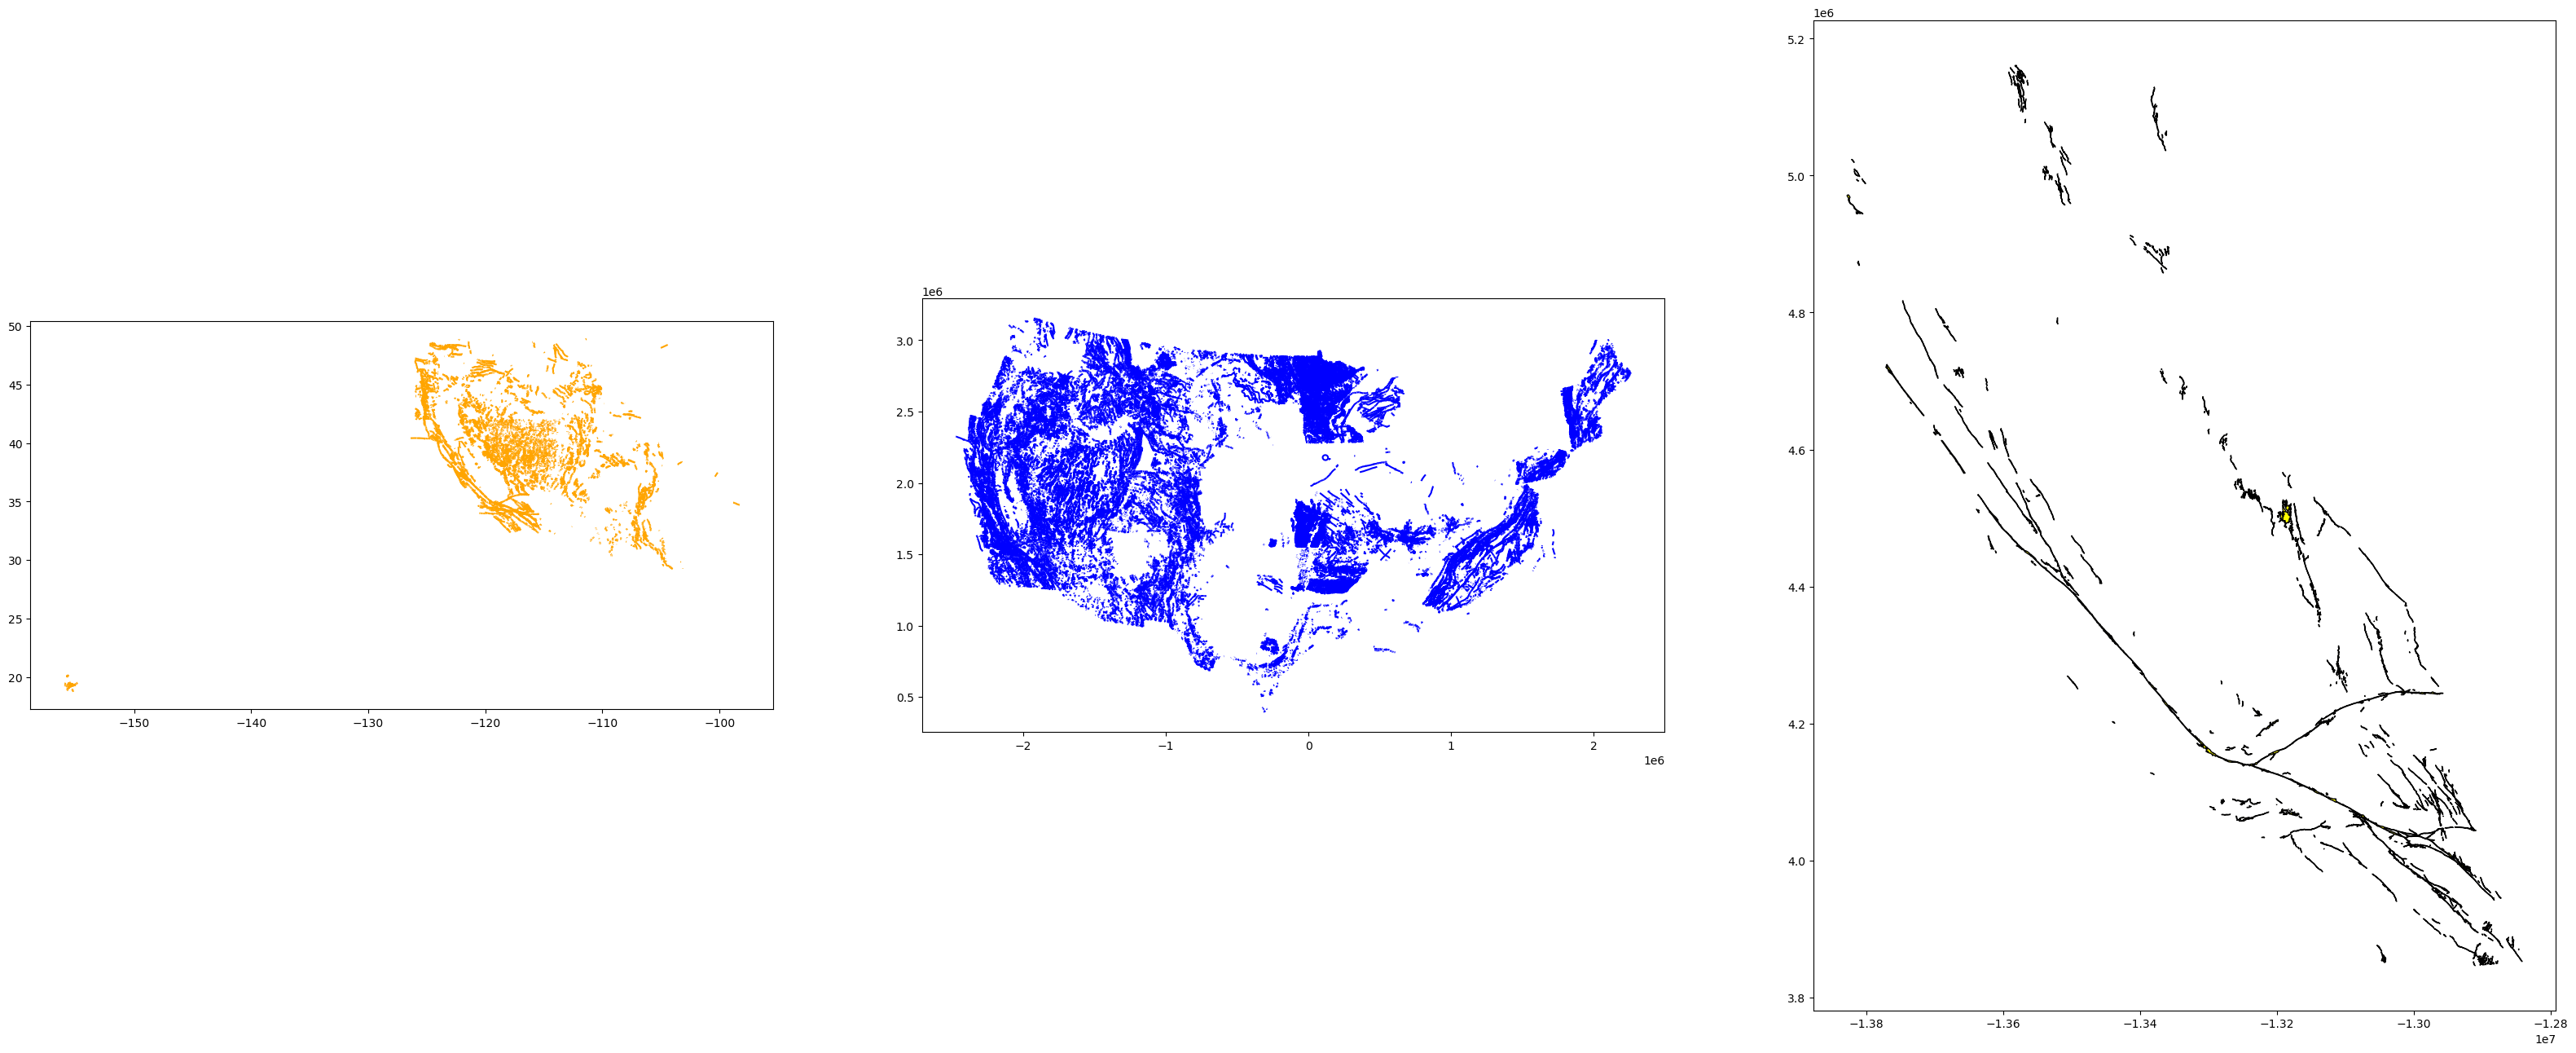

In [225]:
import matplotlib.pyplot as plt

# Assuming California and Fault are GeoDataFrames

fig, ax = plt.subplots(1,3,figsize=(40, 40))

# Plot California GeoDataFrame
# California.plot(ax=ax[0][0], color='lightgrey', edgecolor='black')
# California.plot(ax=ax[0][1], color='lightgrey', edgecolor='black')
# California.plot(ax=ax[0][2], color='lightgrey', edgecolor='black')
# California.plot(ax=ax[1][0], color='lightgrey', edgecolor='black')
# California.plot(ax=ax[1][1], color='lightgrey', edgecolor='black')
# California.plot(ax=ax[1][2], color='lightgrey', edgecolor='black')
# Plot Fault GeoDataFrame
# Fault.plot(ax=ax, color='orange', edgecolor='black')
Fault.plot(ax=ax[0], color='orange', edgecolor='black', label='Fault')

# Plot pointDF on the same axis
# pointDF.plot(ax=ax[0][1], marker='o', color='red', edgecolor='black', markersize=pointDF['Mag'] * 8000, label='do')

# Plot copypoint on the same axis
# copypoint.plot(ax=ax[0][2], marker='x', color='green',figsize=(40, 40), markersize=copypoint['De'] * 8000, label='se')


Fault3.plot(ax=ax[1], color= 'blue', edgecolor='black',  label='Depth')

Fault2.plot(ax=ax[2], color= 'yellow', edgecolor='black',  label='California Fault')

# plt.title('Fault Map', fontsize=40)

# ax.legend(fontsize=30)
# Uncomment the following lines if you want to set specific axis limits
# minx, miny, maxx, maxy = pointDF.total_bounds
# padding = 0.2
# ax.set_xlim(minx - padding, maxx + padding)
# ax.set_ylim(miny - padding, maxy + padding)

# calif.plot(ax=ax, edgecolor='blue', linewidth=1)
# plt.axis('off')
# plt.savefig('earthquake.png', dpi=300)

plt.show()
